In [1]:
# Author: Lee Yat Shun, Jasper
# Copyright (c) 2023 Lee Yat Shun, Jasper. All rights reserved.

In [2]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from caviar import CaviarModel

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('../data/SPY.xlsx')
df.columns = df.iloc[5].values
df = df.iloc[6:].iloc[::-1].reset_index(drop=True)
df['Log Return'] = df.PX_LAST.apply(lambda x: np.log(x)).diff()
df = df.set_index('Date')
df.head()

,PX_LAST,Change,% Change,PX_OPEN,Change,% Change,PX_HIGH,Change,% Change,PX_LOW,Change,% Change,Log Return
Date,,,,,,,,,,,,,
1993-01-29,25.2238,NaN,NaN,25.2417,NaN,NaN,25.2417,NaN,NaN,25.1161,NaN,NaN,NaN
1993-02-01,25.4032,NaN,NaN,25.2417,NaN,NaN,25.4032,NaN,NaN,25.2417,NaN,NaN,0.007087
1993-02-02,25.457,NaN,NaN,25.3852,NaN,NaN,25.4749,NaN,NaN,25.3314,NaN,NaN,0.002116
1993-02-03,25.7261,NaN,NaN,25.4929,NaN,NaN,25.744,NaN,NaN,25.4749,NaN,NaN,0.010515
1993-02-04,25.8337,NaN,NaN,25.8158,NaN,NaN,25.8876,NaN,NaN,25.762,NaN,NaN,0.004174


In [5]:
returns = df['Log Return'].dropna()

## Numeric

In [6]:
in_samples = returns[2000:-2000] * 100
out_of_samples = returns[-2000:] * 100

In [38]:
# initiate parameter
quantile = 0.05 # 1% VAR

In [39]:
# fitting process
caviar_model = CaviarModel(quantile, model='asymmetric', method='mle')
caviar_model.fit(in_samples)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -3840.917147356974
        x: [ 1.248e-01 -3.834e-02  9.330e-01 -8.750e-03  2.014e-01]
      nit: 43
      jac: [-8.735e+00  9.286e+01 -4.273e+01  4.239e+01 -5.076e+01]
     nfev: 642
     njev: 107
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
Final loss: 0.124808896332604
bandwidth: 0.10000071263154608
Time taken(s): 7.13


In [40]:
print('S.E. of beta:', caviar_model.beta_standard_errors)
print('pval of beta:', caviar_model.beta_pvals)

S.E. of beta: [0.01197961 0.02453917 0.03752406 0.08104708]
pval of beta: [0.00068626 0.         0.40781131 0.00648805]


### Backtesting on the out of samples

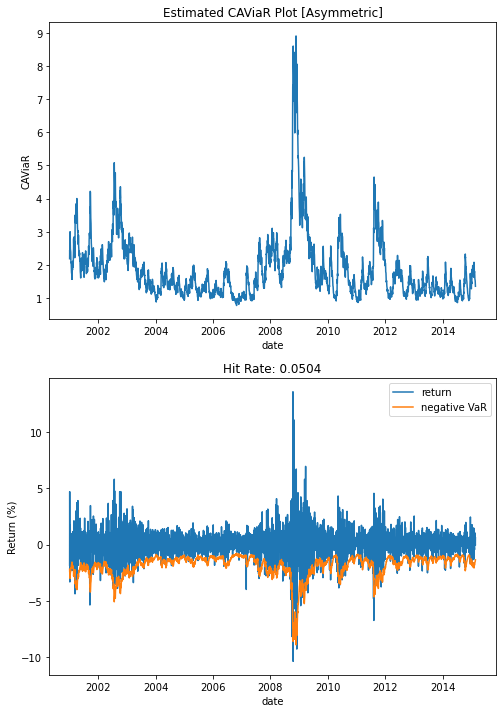

In [41]:
# in sample
caviar_model.plot_caviar(in_samples)

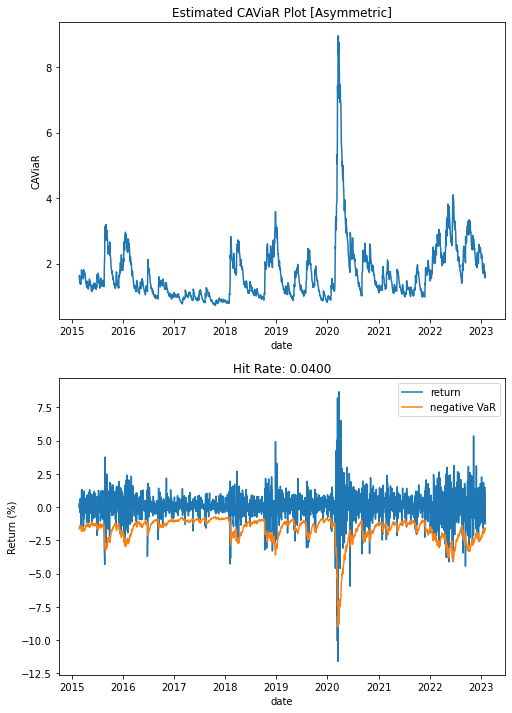

In [42]:
# out of sample
caviar_model.plot_caviar(out_of_samples)

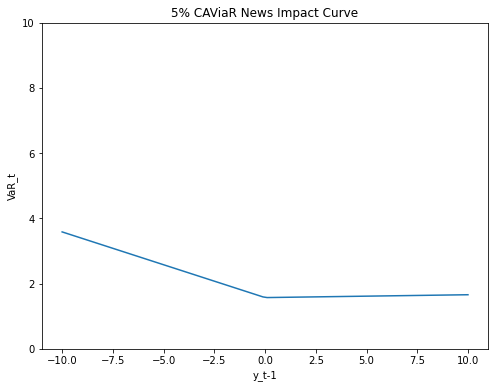

In [43]:
caviar_model.plot_news_impact_curve(VaR=-1.645)

In [34]:
# RQ loss
print(caviar_model.obj(caviar_model.beta, in_samples, caviar_model.quantile, caviar_model.caviar))
print(caviar_model.obj(caviar_model.beta, out_of_samples, caviar_model.quantile, caviar_model.caviar))

0.033688297833472346
0.039809226348831016


In [35]:
print(caviar_model.dq_test(in_samples, 'in'))
print(caviar_model.dq_test(out_of_samples, 'out'))

bandwidth: 0.2340087834644735
0.23193519688848566
bandwidth: 0.5298826396115577
0.9999995644295843


### Forecast

In [36]:
VaR = caviar_model.predict(out_of_samples)

In [37]:
caviar_model.forecast(out_of_samples[-1], VaR[-1])

-2.5630158727477843

### VaR Test